  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
              Year  Selling_Price  Present_Price     Kms_Driven       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.644115   38886.883882    0.247915
min    2003.000000       0.100000       0.32000

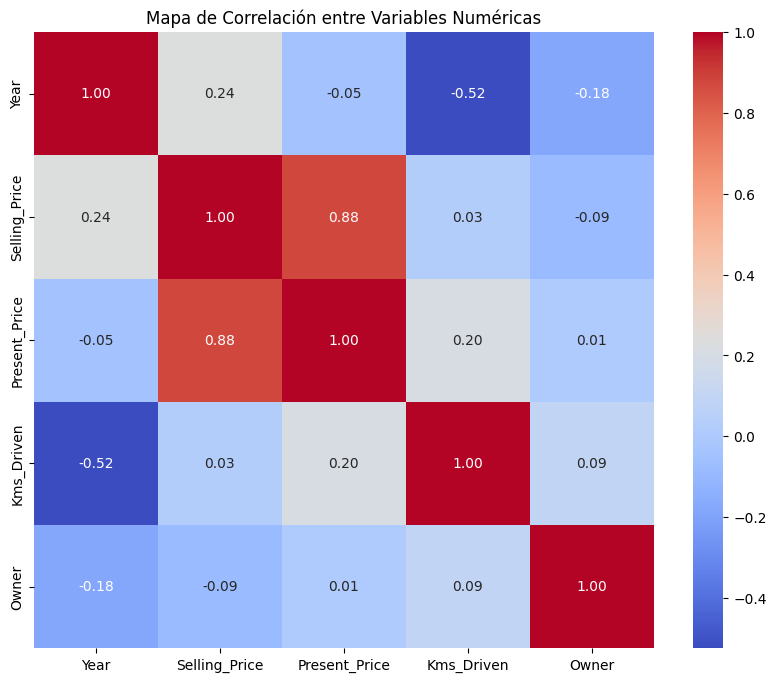

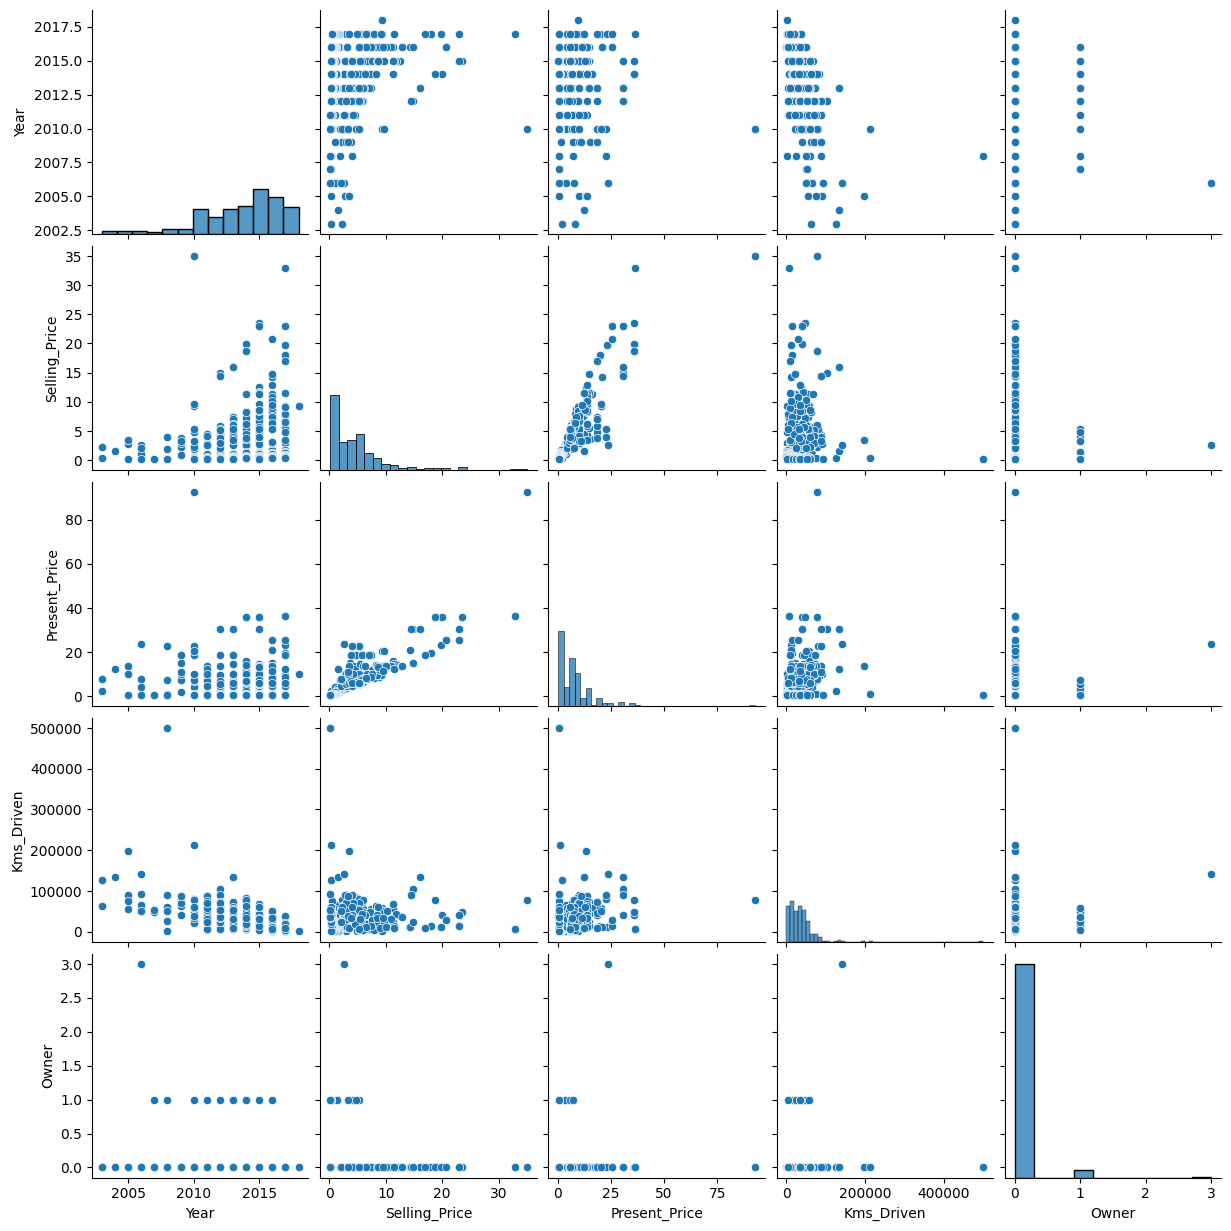

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('./car data.csv')

# Inspeccionar las primeras filas y resumen estadístico
print(data.head())
print(data.describe())
print(data.info())

# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Verificar la correlación entre variables numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlación entre Variables Numéricas')
plt.show()

# Analizar distribuciones de las variables
sns.pairplot(data)
plt.show()


In [5]:
# Verificar valores faltantes
print(data.isnull().sum())

# Llenar o eliminar valores faltantes según convenga
data = data.dropna()  # Eliminar filas con valores nulos, si hay pocas

# Convertir variables categóricas en variables numéricas
data = pd.get_dummies(data, drop_first=True)


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [6]:
from sklearn.feature_selection import SelectKBest, f_regression

# Selección de características
X = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Ver puntuaciones de cada característica
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))


                    Feature        Score
1             Present_Price  1015.923320
101        Fuel_Type_Diesel   131.264543
103  Seller_Type_Individual   130.164012
102        Fuel_Type_Petrol   123.445920
84        Car_Name_fortuner   121.963547
..                      ...          ...
95           Car_Name_swift     0.002886
69            Car_Name_brio     0.002796
88           Car_Name_ignis     0.002206
82        Car_Name_etios gd     0.000305
80     Car_Name_etios cross     0.000091

[105 rows x 2 columns]


In [7]:
from sklearn.model_selection import train_test_split

# Definir las características seleccionadas y la variable objetivo
X = data[['Present_Price', 'Fuel_Type_Diesel', 'Seller_Type_Individual', 'Fuel_Type_Petrol', 'Car_Name_fortuner']]
y = data['Selling_Price']

# Dividir en conjuntos de entrenamiento y prueba (usualmente 80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Realizar predicciones en el conjunto de test
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


MAE: 1.5701568370497898
MSE: 6.230738803496131
RMSE: 2.4961447881675713
R^2: 0.7295167918136412


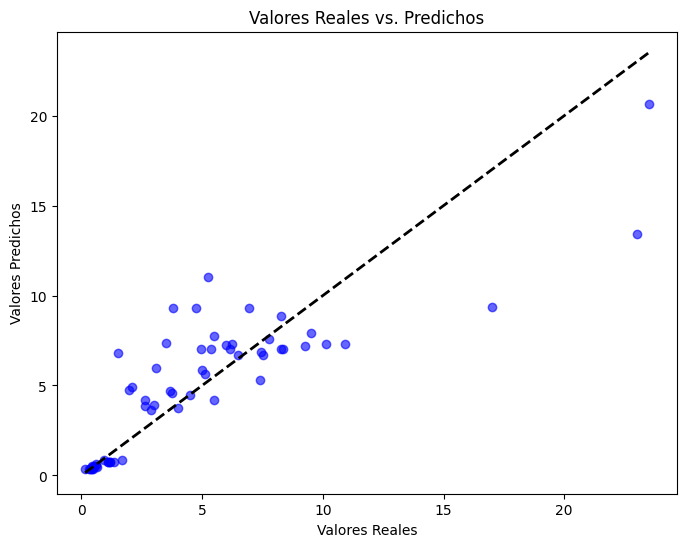

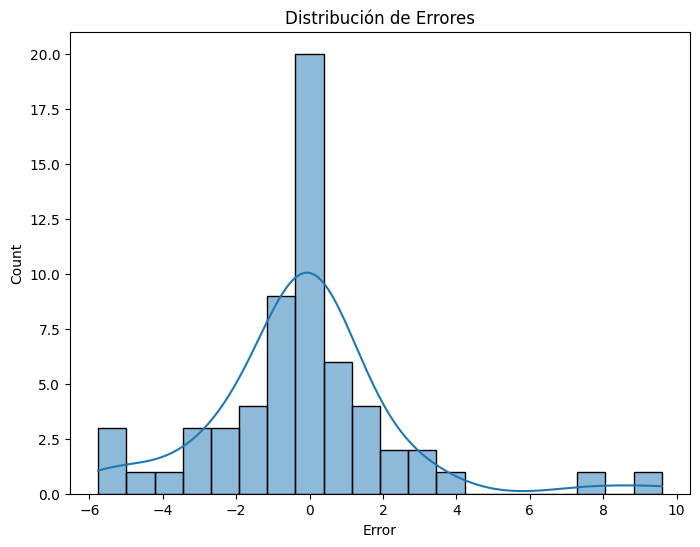

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersión de valores reales vs. predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Valores Reales vs. Predichos')
plt.show()

# Distribución de errores
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Error')
plt.title('Distribución de Errores')
plt.show()
